In [4]:
def test_integer(choice):
    
    #define a range of accetable values for choice if it is a digit
    acceptable_range = range(1,10)

    # test if choice is a digit, if not return true of false
    if choice.isdigit() and choice in acceptable_range:
        return True
    else: 
        return False

value = input()
print(test_integer(value))


False


In [11]:
import numpy as np

x = np.array([[1,2,3], [3,4,6], [5,6,7]])

print(x.shape)

y= x.reshape(9,1)

print(y)

print(np.max(x, axis=0).shape)


(3, 3)
[[1]
 [2]
 [3]
 [3]
 [4]
 [6]
 [5]
 [6]
 [7]]
(3,)


In [37]:

x= np.random.random((2,3,4,2))
print(x)
print(x.shape[0])
print("\n")
print(x[np.array([0,2]),:])
word="TESTING"
print(f'\n this is the output {len(word)}{x[x>0.5]}')


[[[[0.89363163 0.14146887]
   [0.79321655 0.56031234]
   [0.01921367 0.58316988]
   [0.75179686 0.85607503]]

  [[0.82478064 0.48606956]
   [0.80202194 0.66615207]
   [0.19628443 0.18572193]
   [0.48317316 0.80523843]]

  [[0.81551075 0.10741258]
   [0.88907329 0.81024124]
   [0.84221674 0.84593472]
   [0.98485882 0.6121467 ]]]


 [[[0.95969623 0.64090281]
   [0.8176355  0.00130342]
   [0.99101199 0.323639  ]
   [0.39808656 0.78132698]]

  [[0.70336652 0.9626807 ]
   [0.31280192 0.63325288]
   [0.63694023 0.1681196 ]
   [0.15395964 0.28271181]]

  [[0.73266024 0.3803239 ]
   [0.68900504 0.58505696]
   [0.74247439 0.17178971]
   [0.48835997 0.49210994]]]]
2




IndexError: index 2 is out of bounds for axis 0 with size 2

In [5]:
import torch
import torch.nn as nn

# Import pprint, module we use for making our print statements prettier
import pprint
pp = pprint.PrettyPrinter()

In [35]:
# Initializing a tensor
data = torch.tensor([
    [[1, 2], [3, 4]],
    [[5, 6], [7, 8]],
    [[9, 10], [11, 12]]
], dtype=torch.float32)
print(data)
print(data.shape)

tensor([[[ 1.,  2.],
         [ 3.,  4.]],

        [[ 5.,  6.],
         [ 7.,  8.]],

        [[ 9., 10.],
         [11., 12.]]])
torch.Size([3, 2, 2])


In [52]:
rr= torch.tensor([16])
print(rr.shape)
#rr2 = rr.view(5,3)
#print(rr.shape)

print(rr.item())

torch.Size([1])
16


In [55]:
x = torch.tensor([2.], requires_grad=True)
pp.pprint(x.grad)
y = 3*x*x   
y.backward()
pp.pprint(x.grad)
z = 3*x*x   
z.backward()
pp.pprint(x.grad)


None
tensor([12.])
tensor([24.])


In [59]:
input = torch.ones(2,3,4)

print(input)

linear = nn.Linear(4,2)
linear_output = linear(input)
linear_output
list(linear.parameters())


tensor([[[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]],

        [[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]])


[Parameter containing:
 tensor([[ 0.3514, -0.0921,  0.3084,  0.3070],
         [-0.3479,  0.4746,  0.3020, -0.4017]], requires_grad=True),
 Parameter containing:
 tensor([ 0.3308, -0.1603], requires_grad=True)]

In [13]:
import torch
import torch.nn as nn
import torch.optim as optim

class MultiLayerPerceptron(nn.Module):
    
    def  __init__(self, input_size, hidden_size):
        super(MultiLayerPerceptron, self).__init__()

        self.input_size  = input_size
        self.hidden_size = hidden_size

        self.model = nn.Sequential(
            nn.Linear(self.input_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, self.input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        output = self.model(x)
        return output

input = torch.randn(2,5)

model = MultiLayerPerceptron(5,3)
model(input)

list(model.named_parameters())

y= torch.ones(10,5)
print(y)
x= y + torch.randn_like(y)
print(x)

#optimizer
adam = optim.Adam(model.parameters(), lr=1e-1)

loss_function = nn.BCELoss()

y_pred = model(x)
loss_function(y_pred, y).item()

n_epoch =10

for epoch in range(n_epoch):

    adam.zero_grad()

    y_pred =  model(x)

    loss = loss_function(y_pred, y)

    print(f"Epoch {epoch}: training loss : {loss}")

    loss.backward()

    adam.step()

list(model.parameters())



tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])
tensor([[ 2.5386,  0.3720,  0.8080,  2.2315,  2.2173],
        [ 0.5254,  0.5200,  1.1990,  0.2258,  0.7801],
        [ 1.6315,  1.1922,  0.6696,  0.3410,  2.5788],
        [-1.2737,  0.6471,  0.0596,  1.2637,  1.1105],
        [ 0.2844,  1.0774,  0.4187,  0.1808,  1.0775],
        [ 1.2208,  1.6134,  1.8308,  0.6819, -0.6802],
        [-1.3595,  0.8308,  0.8863,  0.0514,  0.2754],
        [ 0.2735,  0.7549,  1.0603,  2.1468,  1.8559],
        [-1.1103, -0.7416,  4.0320,  3.8837,  0.9579],
        [ 1.5037,  0.8746,  0.4616,  1.9652,  0.4057]])
Epoch 0: training loss : 0.6293399333953857
Epoch 1: training loss : 0.572699785232544
Epoch 2: training loss : 0.5066803097724915
Epoch 3: training

AttributeError: type object 'list' has no attribute 'model'

In [5]:
import asyncio


async def fetch_data(delay):
    print("fetching data..")
    await asyncio.sleep(delay)
    print("data fetched")
    return {"data":"Some data"}

async def main():
    print   ("Start the main routine")
    task = fetch_data(2)
    result = await task
    print(f"Received result: {result}")
    print("End of main coroutine")

asyncio.run(main())





RuntimeError: asyncio.run() cannot be called from a running event loop

In [3]:
import os


class testClass:
    def __init__(self, param1, param2):
        self.param1 =  param1
        self.param2 = param2

    def some_method(self):
        print(self.param1)
        print(self.param2)

test = testClass(1,2)
test.some_method()
type(test)

1
2


__main__.testClass

In [32]:
class parentClass:
    def __init__(self, name):
        self.name=name
        print("Initializing base class")

    # def func1(self):
    #     raise NotImplementedError("subclass must implement this abstract method")

test = parentClass("test")

class derivedClass(parentClass):
    def __init__(self,name):
        parentClass.__init__(self, name)
        print("initialized derived")

    def func1(self):
        print("from the derived class", self.name)
     

test2 = derivedClass("hi")
test2.func1()     
        
test_dict = {"ravi":45, "meera":12, "anu":10}

list_1=["hi", "why", "are", "you"]

sorted(test_dict.items())

for k, v in test_dict.items():
    print(k, v)


sorted(test_dict.items(), key=lambda item:item[0])

for k, v in test_dict.items():
    print(k, v)



Initializing base class
Initializing base class
initialized derived
from the derived class hi
ravi 45
meera 12
anu 10
ravi 45
meera 12
anu 10


In [36]:
class line:
    def __init__(self, cor1, cor2):
        self.coordinate_1 = cor1
        self.coordinate_2 = cor2

    def distance(self):
        x1,y1 = self.coordinate_1
        x2,y2 = self.coordinate_2
        dist = ((x1-x2)**2 + (y1-y2)**2)**0.5
        return dist
    
        


numbers = (1,2,3,4,5,6)
print(numbers)

test_num = 4

if test_num in numbers:
    print("TRUE")
else:
    print("FALSE")

coordinate_1 = (3,4)
coordinate_2= (4,5)

line_1 = line(coordinate_1, coordinate_2)
print(line_1.distance())



(1, 2, 3, 4, 5, 6)
TRUE
1.4142135623730951


In [57]:
import numpy as np
import math, random
import time

trueW =  np.array([1, 2, 3,4,5])
print(len(trueW))

def generate():
    x = np.random.randn(len(trueW))
    y = trueW.dot(x) + np.random.randn()
   # print(x, y)
    return (x,y)

training_data = [generate() for i in range(10000)]

print(random.sample(training_data, 10))

def phi(x):
    return np.array(x)

def stochastic_gradient_loss(w, i):
    x, y = training_data[i]
    return (x.dot(w)-y)**2

def gradient_descent_loss(w):
    sum =0.0
    for i in range(len(training_data)):
        x, y = training_data[i]
        sum += (x.dot(w)-y)**2
    return (1/len(training_data))* sum

def stochastic_gradient(w, i):
    x, y = training_data[i]
    return 2*(x.dot(w)-y) * phi(x)

def gradient_descent(w):
    sum =0.0
    for i in range(len(training_data)):
        x, y = training_data[i]
        sum += 2*(x.dot(w)-y) * phi(x)
    return (1/len(training_data))* sum

def gradientDescentAlgo(f, gradientLoss, weightVectors):
    start_time = time.time()
    learning_rate=0.1
    numberIter=0
    objectiveLoss =0
    for epoch  in range(500):
        numberIter+=1
        objectiveLoss = f(weightVectors)
        #learnign_rate = 1/math.sqrt(numberIter)
        weightGradient = gradientLoss(weightVectors)
        weightVectors = weightVectors - learnign_rate*weightGradient
    
    end_time= time.time()
    print(f"epoch :{epoch}, weights: {weightVectors}, Loss: {objectiveLoss}, time: {end_time-start_time}")


def stochasticGradientDescentAlgo(f, gradientLoss, weightVectors ):
    start_time = time.time()
    learning_rate=0
    numberIter=0
    objectiveLoss =0
    for epoch  in range(500):
        for i in range(len(training_data)):
            numberIter+=1
            objectiveLoss = f(weightVectors,i)
            learnign_rate = 1/math.sqrt(numberIter)
            weightGradient = gradientLoss(weightVectors, i )
            weightVectors = weightVectors - learnign_rate*weightGradient
    end_time= time.time()
    print(f"epoch :{epoch}, weights: {weightVectors}, Loss: {objectiveLoss}, time: {end_time-start_time}")

weightVec = np.array([0, 0, 0, 0 , 0])
gradientDescentAlgo(gradient_descent_loss, gradient_descent, weightVec)
stochasticGradientDescentAlgo(stochastic_gradient_loss, stochastic_gradient, weightVec)

5
[(array([ 0.9871204 ,  0.32783003,  0.30457754, -0.13104914,  0.60398582]), 5.477323901170576), (array([-0.09088398,  0.82279392, -1.64703015, -0.10021396, -0.61280305]), -6.143485213383823), (array([ 1.38000401, -1.27306051,  1.27770571,  1.4237993 ,  0.10737795]), 9.586924087470823), (array([ 0.17386484, -0.8676336 , -0.10774474,  0.00374315, -0.74511064]), -3.4740786206689513), (array([ 0.35288503, -0.90221697,  1.29358751, -0.42036975, -0.35538412]), -0.5860783036023254), (array([-0.60406304,  0.01033649,  1.24826129,  0.59594579, -0.36175412]), 3.592494199295074), (array([-0.17248016, -0.00179429, -0.14596867,  1.44138801,  0.27443067]), 5.72262112721763), (array([ 1.04293244,  0.34655641,  2.57228989, -1.69724753, -0.96720463]), -1.2965801883093442), (array([ 0.42577898, -1.27316715, -0.89379454,  0.38053348,  0.8247727 ]), -0.023048003076517554), (array([-0.33838368,  0.67897096,  1.0923408 , -0.12434183, -0.4828724 ]), 0.8889313719159078)]
epoch :499, weights: [0.99666008 2.0

In [75]:
import torch

tensor_A = torch.tensor([[1., 2.],
        [3., 4.],
        [5., 6.]], dtype=torch.float32)

torch.manual_seed(44)

linear = torch.nn.Linear(in_features=2, out_features=6)

x= tensor_A
output = linear(x)
print(f"Input tensor dim : {x.shape}")
print(f"Out matrix dim is : {output.shape}")
print(output)

x = x.squeeze(dim=1)
print(f"Input tensor dim : {x.shape}")
print(x)

y = torch.arange(1, 10, 1)
print(y)
y= y.reshape(1,9)
print(f"{y}, {y.shape}")
y= y.squeeze()
print(f"{y}, {y.shape}")





Input tensor dim : torch.Size([3, 2])
Out matrix dim is : torch.Size([3, 6])
tensor([[ 1.3980, -1.1917,  1.1455, -1.3492,  1.7862,  1.7594],
        [ 2.6715, -1.2988,  2.1572, -2.7651,  4.2068,  3.8771],
        [ 3.9451, -1.4058,  3.1689, -4.1810,  6.6274,  5.9948]],
       grad_fn=<AddmmBackward0>)
Input tensor dim : torch.Size([3, 2])
tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])
tensor([[1, 2, 3, 4, 5, 6, 7, 8, 9]]), torch.Size([1, 9])
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]), torch.Size([9])


In [76]:
import numpy as np

x = np.arange(1, 10, 1)
print(x)
tensor = torch.from_numpy(x)
print(tensor)
x = x +1
x, tensor


[1 2 3 4 5 6 7 8 9]
tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])


(array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
 tensor([1, 2, 3, 4, 5, 6, 7, 8, 9]))

In [78]:
torch.manual_seed(100)

tensor_1 = torch.randn(3,4)

torch.manual_seed(100)
tensor_2 = torch.randn(3,4)

tensor_1 == tensor_2




tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

In [84]:
!nvidia-smi
if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available

device

zsh:1: command not found: nvidia-smi


'mps'

In [89]:
tensor = torch.tensor([1,2,3])

print(tensor, tensor.device)

tensor_on_gpu = tensor.to(device)
print(tensor_on_gpu, tensor_on_gpu.device)

tensor_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_on_cpu

tensor([1, 2, 3]) cpu
tensor([1, 2, 3], device='mps:0') mps:0


array([1, 2, 3])

device : mps

torch.Size([800, 5])
torch.Size([800])
torch.Size([200, 5])
torch.Size([200])
Self weights size : torch.Size([5])
prediction vector shapes torch.Size([200])
Before training..


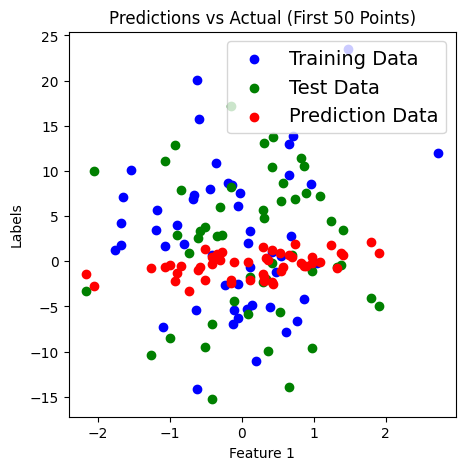

Epoch: 0 | MAE Train Loss: 6.582727432250977 | MAE Test Loss: 6.688851833343506 
Parameter weights: tensor([ 0.3375,  0.1307,  0.2370,  0.2339, -1.1165])
Parameter bias: tensor([-0.1854])
Epoch: 10 | MAE Train Loss: 6.517925262451172 | MAE Test Loss: 6.623085975646973 
Parameter weights: tensor([ 0.3452,  0.1498,  0.2622,  0.2692, -1.0525])
Parameter bias: tensor([-0.1764])
Epoch: 20 | MAE Train Loss: 6.453129291534424 | MAE Test Loss: 6.5573272705078125 
Parameter weights: tensor([ 0.3530,  0.1689,  0.2873,  0.3047, -0.9886])
Parameter bias: tensor([-0.1674])
Epoch: 30 | MAE Train Loss: 6.388368129730225 | MAE Test Loss: 6.491595268249512 
Parameter weights: tensor([ 0.3606,  0.1880,  0.3124,  0.3406, -0.9249])
Parameter bias: tensor([-0.1581])
Epoch: 40 | MAE Train Loss: 6.32362174987793 | MAE Test Loss: 6.425890922546387 
Parameter weights: tensor([ 0.3682,  0.2070,  0.3374,  0.3766, -0.8614])
Parameter bias: tensor([-0.1488])
Epoch: 50 | MAE Train Loss: 6.258930683135986 | MAE Test

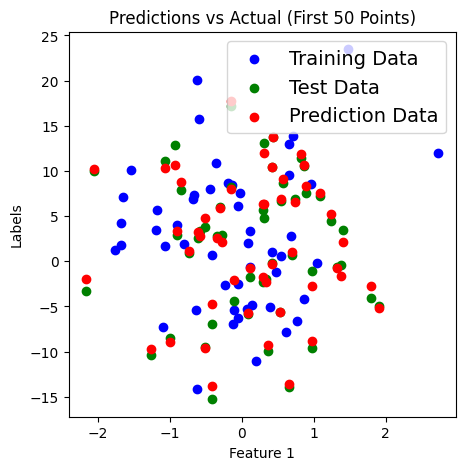

Saving model to: models/01_pytorch_workflow_model_0.pth
Self weights size : torch.Size([5])


tensor([True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, True, True, True, True, True, True, True,
        True, True, True, True, True, Tr

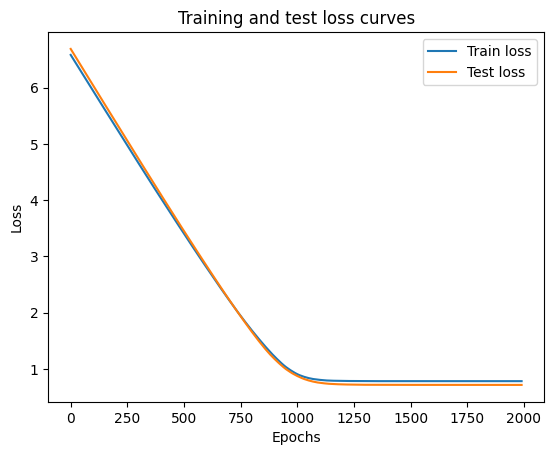

In [9]:
#define the true weight array
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import numpy as np

trueWeight = np.array([1,2,3,4,5])
bias = 0.5

def generate():
    dataset=[]
    for i in range(1000):
        x = np.random.randn(len(trueWeight))
        y = trueWeight.dot(x) + bias + np.random.randn()
        #add the numpy array as is without 
        dataset.append((x,y))
    return dataset

def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):
    plt.figure(figsize=(5,5))

    train_data=train_data[:50]
    train_labels = train_labels[:50]
    test_data = test_data[:50]
    test_labels = test_labels[:50]

    if predictions is not None:
        predictions = predictions[:50]

    plt.scatter(train_data[:,0], train_labels, c='b', label='Training Data')
    plt.scatter(test_data[:,0], test_labels, c='g', label='Test Data')

    if predictions is not None:
        plt.scatter(test_data[:,0], predictions, c='r', label='Prediction Data')

    plt.title("Predictions vs Actual (First 50 Points)")
    plt.xlabel("Feature 1")
    plt.ylabel("Labels")
    plt.legend(prop={"size": 14})
    plt.show()

class TestLinearRegressionModel(nn.Module):
    def __init__(self): 
        super().__init__()
        self.weights = nn.Parameter(torch.randn(len(trueWeight), dtype=torch.float), requires_grad=True)
        print("Self weights size :", self.weights.shape)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad= True)
    
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return x.matmul(self.weights) + self.bias


#plot loss
def plotlosscurve(train_loss_values, test_loss_values, epoch_count):
    plt.plot(epoch_count, train_loss_values, label="Train loss")
    plt.plot(epoch_count, test_loss_values, label="Test loss")
    plt.title("Training and test loss curves")
    plt.ylabel("Loss")
    plt.xlabel("Epochs")
    plt.legend();


if torch.cuda.is_available():
    device = "cuda" # Use NVIDIA GPU (if available)
elif torch.backends.mps.is_available():
    device = "mps" # Use Apple Silicon GPU (if available)
else:
    device = "cpu" # Default to CPU if no GPU is available

print(f"device : {device}")

# main routine
dataset= generate()

x_list, y_list = zip(*dataset)
x_tensor = torch.tensor(x_list, dtype= torch.float32)
y_tensor = torch.tensor(y_list, dtype= torch.float32)


# for i in range(10):
#     print (x[i], y[i])
# Create *known* parameters
# weight = 0.7
# bias = 0.3

# # Create data
# start = 0
# end = 1
# step = 0.02
# X = torch.arange(start, end, step).unsqueeze(dim=1)
# y = weight * X + bias +  np.random.randn()

train_split = int(0.8* len(x_tensor))
x_train, y_train = x_tensor[:train_split], y_tensor[:train_split]
x_test, y_test = x_tensor[train_split:], y_tensor[train_split:]

print("")
len(x_train), len(y_train), len(x_test), len(y_test)

print(x_train.shape)
print(y_train.shape)

#x_tensor = x_tensor.squeeze(1)

print(x_test.shape)
print(y_test.shape)

#plot_predictions(x_train, y_train, x_test, y_test)

torch.manual_seed(42)
model_0 = TestLinearRegressionModel()
list(model_0.parameters())
model_0.state_dict()

with torch.inference_mode():
    y_preds = model_0(x_test)

print("prediction vector shapes", y_preds.shape)
#print(y_preds)

print("Before training..")
plot_predictions(x_train, y_train, x_test, y_test, y_preds)

#define the loss function
loss_fn = nn.L1Loss()

#Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

#number of epochs
epochs =2000

#create empty training and test loss vectors
train_loss_values = []
test_loss_values=[]
epoch_count=[]

for epoch in range(epochs):

    #put the model in a training mode
    model_0.train()
    y_pred = model_0(x_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #set to eval mode
    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(x_test)
        test_loss = loss_fn(test_pred, y_test.type(torch.float))

        if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
            # Print model parameters
            for name, param in model_0.named_parameters():
                if param.requires_grad:
                    print(f"Parameter {name}: {param.data}")


print(f"After training for {epoch} iterations")
plot_predictions(x_train, y_train, x_test, y_test, test_pred)
plotlosscurve(train_loss_values, test_loss_values, epoch_count)

from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# 3. Save the model state dict 
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 =  TestLinearRegressionModel()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

loaded_model_0.eval()

with torch.inference_mode():
    loaded_model_preds = loaded_model_0(x_test)

test_pred == loaded_model_preds




First 5 X features:
[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]

First 5 y labels:
[1 1 1 1 0]


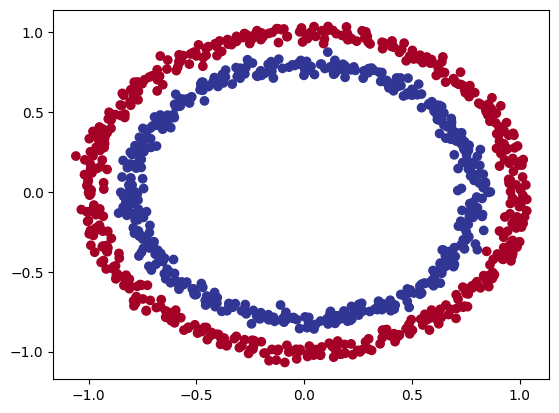

In [23]:
from sklearn.datasets import make_circles
import pandas as pd


n_samples = 1000

X, y = make_circles(n_samples, noise=0.03, random_state=42)

print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")

circles = pd.DataFrame({"X1": X[:,0], "X2": X[:,1], "label":y})

circles.head(5)

circles.label.value_counts()

plt.scatter(x=X[:, 0], 
            y=X[:, 1], 
            c=y, 
            cmap=plt.cm.RdYlBu)





In [58]:
import torch

print(X.shape)
print(y.shape)

X = X.type(torch.float)
Y = torch.from_numpy(y).type(torch.float)

X[:5], Y[:5]



torch.Size([1000, 2])
(1000,)


(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size =0.2, random_state=42)

len(X_train), len(X_test), len(y_train), len(y_test)

class  circleModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    
model_0 = circleModel()

model_0


circleModel(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [80]:
import torch

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct/len(y_pred))*100
    return acc

untrained_preds = model_0(X_test)
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

#loss_fn = nn.BCEWithLogitsLoss()
loss_fn = nn.BCEWithLogitsLoss() 
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)
torch.manual_seed(42)

epochs=100

for epoch in range(epochs):
    #set in train mode
    model_0.train()

    y_logits = model_0(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    #y_logits.shape()
    #print(f" The sizes are - {y_pred.shape}, {y_train.shape}")

    # 2. Calculate loss/accuracy
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true = y_train, y_pred= y_pred)
    optimizer.zero_grad()
    loss.backward()

    ### Testing
    model_0.eval()
    with torch.inference_mode():
        #forward pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))
        # Calculate loss/accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true = y_test, y_pred= test_pred)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")





Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[0.0167],
        [0.0207],
        [0.0126],
        [0.0171],
        [0.0420],
        [0.0239],
        [0.0315],
        [0.0330],
        [0.0116],
        [0.0208]], grad_fn=<SliceBackward0>)

First 10 test labels:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])
Epoch: 0 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69325, Test acc: 50.00%
Epoch: 10 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69325, Test acc: 50.00%
Epoch: 20 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69325, Test acc: 50.00%
Epoch: 30 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69325, Test acc: 50.00%
Epoch: 40 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69325, Test acc: 50.00%
Epoch: 50 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69325, Test acc: 50.00%
Epoch: 60 | Loss: 0.69295, Accuracy: 50.00% | Test loss: 0.69325, Test acc: 50.00%
Epoch: 7

In [76]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists, skipping download


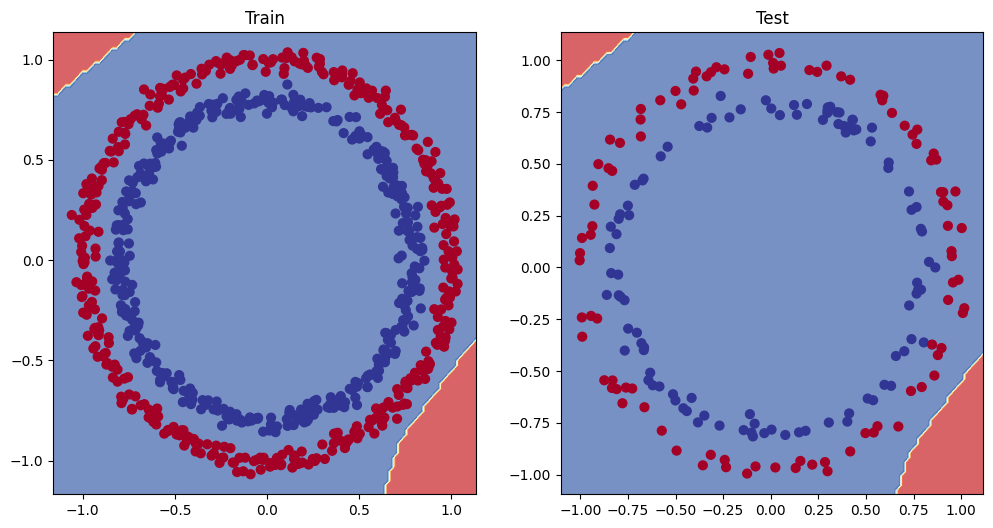

In [77]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)